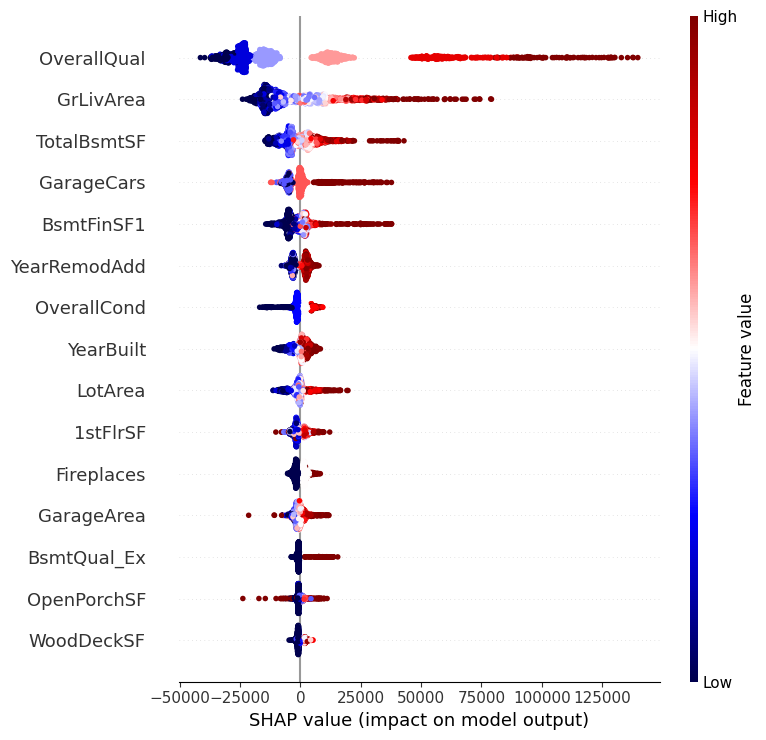

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

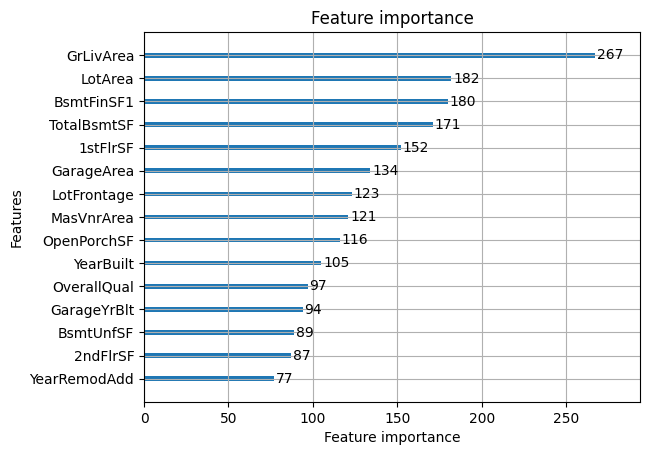

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import lightgbm as lgbm
import shap
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

X_train = train.iloc[:, 1:-1]
y_train = train.iloc[:, -1]

X_train = pd.get_dummies(X_train)
test = pd.get_dummies(test)

missing_cols = set(X_train.columns) - set(test.columns)
for c in missing_cols:
    test[c] = 0
test = test[X_train.columns]

model = lgbm.LGBMRegressor()
model.fit(X_train, y_train)

explainer = shap.Explainer(model)
shap_values = explainer(test)

shap.summary_plot(shap_values, test, max_display=15, cmap='seismic')

lgbm.plot_importance(model, max_num_features=15)

[I 2023-04-16 22:59:59,246] A new study created in memory with name: no-name-adb9301e-d98b-4419-a6a1-bac329d57286
[I 2023-04-16 22:59:59,276] Trial 0 finished with value: 84369.9041148599 and parameters: {'n_estimators': 10000, 'learning_rate': 0.04622848187201011, 'num_leaves': 1200, 'max_depth': 5, 'min_data_in_leaf': 7300, 'max_bin': 209, 'lambda_l1': 10, 'lambda_l2': 40, 'min_gain_to_split': 0.21793184630053197, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 0 with value: 84369.9041148599.
[I 2023-04-16 22:59:59,298] Trial 1 finished with value: 80108.82184939735 and parameters: {'n_estimators': 10000, 'learning_rate': 0.09984811056225748, 'num_leaves': 2840, 'max_depth': 4, 'min_data_in_leaf': 9700, 'max_bin': 221, 'lambda_l1': 5, 'lambda_l2': 10, 'min_gain_to_split': 10.790315537332726, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 1 with value: 80108.82184939735.
[I 2023-04-16 22:59:59,322

[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=7300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7300
[LightGBM] [Warning] min_gain_to_split is set=0.21793184630053197, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.21793184630053197
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM]

[I 2023-04-16 22:59:59,449] Trial 7 finished with value: 78255.41340591146 and parameters: {'n_estimators': 10000, 'learning_rate': 0.10179215179226041, 'num_leaves': 1340, 'max_depth': 12, 'min_data_in_leaf': 4300, 'max_bin': 238, 'lambda_l1': 80, 'lambda_l2': 25, 'min_gain_to_split': 0.014438322070964293, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 6 with value: 75294.40924446961.
[I 2023-04-16 22:59:59,481] Trial 8 finished with value: 76958.92585690082 and parameters: {'n_estimators': 10000, 'learning_rate': 0.17355327489089264, 'num_leaves': 320, 'max_depth': 11, 'min_data_in_leaf': 3400, 'max_bin': 235, 'lambda_l1': 80, 'lambda_l2': 50, 'min_gain_to_split': 10.198056462085686, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 6 with value: 75294.40924446961.
[I 2023-04-16 22:59:59,513] Trial 9 finished with value: 88938.08951621517 and parameters: {'n_estimators': 10000, 'lear

[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=3400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3400
[LightGBM] [Warning] min_gain_to_split is set=10.198056462085686, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.198056462085686
[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [

[I 2023-04-16 22:59:59,676] Trial 12 finished with value: 67055.90161802483 and parameters: {'n_estimators': 10000, 'learning_rate': 0.21450617460148427, 'num_leaves': 1940, 'max_depth': 10, 'min_data_in_leaf': 2800, 'max_bin': 249, 'lambda_l1': 45, 'lambda_l2': 65, 'min_gain_to_split': 7.059963199798634, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 12 with value: 67055.90161802483.
[I 2023-04-16 22:59:59,736] Trial 13 finished with value: 77652.436197599 and parameters: {'n_estimators': 10000, 'learning_rate': 0.2296879133673386, 'num_leaves': 2240, 'max_depth': 9, 'min_data_in_leaf': 8100, 'max_bin': 273, 'lambda_l1': 40, 'lambda_l2': 100, 'min_gain_to_split': 6.116604911996893, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 12 with value: 67055.90161802483.
[I 2023-04-16 22:59:59,795] Trial 14 finished with value: 69192.73878732111 and parameters: {'n_estimators': 10000, 'learni

[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=8100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8100
[LightGBM] [Warning] min_gain_to_split is set=6.116604911996893, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.116604911996893
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Wa

[I 2023-04-16 22:59:59,955] Trial 17 finished with value: 91795.95029136576 and parameters: {'n_estimators': 10000, 'learning_rate': 0.22586602058595484, 'num_leaves': 1040, 'max_depth': 8, 'min_data_in_leaf': 2700, 'max_bin': 279, 'lambda_l1': 55, 'lambda_l2': 70, 'min_gain_to_split': 7.903824033062946, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 12 with value: 67055.90161802483.
[I 2023-04-16 23:00:00,005] Trial 18 finished with value: 81823.31474879697 and parameters: {'n_estimators': 10000, 'learning_rate': 0.25952102684367184, 'num_leaves': 1760, 'max_depth': 6, 'min_data_in_leaf': 1700, 'max_bin': 200, 'lambda_l1': 35, 'lambda_l2': 80, 'min_gain_to_split': 4.597384740979534, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 12 with value: 67055.90161802483.
[I 2023-04-16 23:00:00,058] Trial 19 finished with value: 78876.94770497989 and parameters: {'n_estimators': 10000, 'learning_rate': 0.2050622065015795,

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=2700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2700
[LightGBM] [Warning] min_gain_to_split is set=7.903824033062946, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.903824033062946
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1

[I 2023-04-16 23:00:00,273] Trial 20 finished with value: 38732.40878477142 and parameters: {'n_estimators': 10000, 'learning_rate': 0.15213474176803696, 'num_leaves': 940, 'max_depth': 8, 'min_data_in_leaf': 300, 'max_bin': 247, 'lambda_l1': 50, 'lambda_l2': 65, 'min_gain_to_split': 8.022654999495124, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 20 with value: 38732.40878477142.
[I 2023-04-16 23:00:00,331] Trial 21 finished with value: 77505.14474914958 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1435559692725973, 'num_leaves': 960, 'max_depth': 8, 'min_data_in_leaf': 1200, 'max_bin': 246, 'lambda_l1': 50, 'lambda_l2': 65, 'min_gain_to_split': 7.9371695099930815, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 20 with value: 38732.40878477142.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=1200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1200
[LightGBM] [Warning] min_gain_to_split is set=7.9371695099930815, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.9371695099930815
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=65, reg_lambda=0.0 will be ignored. Current value: lambda_l2=65
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Wa

[I 2023-04-16 23:00:00,719] Trial 22 finished with value: 40388.511340448815 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1495353936600503, 'num_leaves': 1540, 'max_depth': 10, 'min_data_in_leaf': 300, 'max_bin': 261, 'lambda_l1': 65, 'lambda_l2': 55, 'min_gain_to_split': 5.908980395421199, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 20 with value: 38732.40878477142.


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_gain_to_split is set=6.960258415782057, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.960258415782057
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-04-16 23:00:00,990] Trial 23 finished with value: 32694.53488464677 and parameters: {'n_estimators': 10000, 'learning_rate': 0.14676687667112, 'num_leaves': 1480, 'max_depth': 8, 'min_data_in_leaf': 300, 'max_bin': 262, 'lambda_l1': 65, 'lambda_l2': 50, 'min_gain_to_split': 6.960258415782057, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 23 with value: 32694.53488464677.
[I 2023-04-16 23:00:01,091] Trial 24 finished with value: 33925.2061817621 and parameters: {'n_estimators': 10000, 'learning_rate': 0.13960917063181247, 'num_leaves': 840, 'max_depth': 6, 'min_data_in_leaf': 200, 'max_bin': 260, 'lambda_l1': 65, 'lambda_l2': 50, 'min_gain_to_split': 8.354831034448305, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 23 with value: 32694.53488464677.


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=8.354831034448305, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.354831034448305
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=300

[I 2023-04-16 23:00:01,262] Trial 25 finished with value: 34140.86702884665 and parameters: {'n_estimators': 10000, 'learning_rate': 0.12813804304781584, 'num_leaves': 820, 'max_depth': 6, 'min_data_in_leaf': 300, 'max_bin': 280, 'lambda_l1': 75, 'lambda_l2': 30, 'min_gain_to_split': 8.367929130654899, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 23 with value: 32694.53488464677.
[I 2023-04-16 23:00:01,318] Trial 26 finished with value: 67400.6260103695 and parameters: {'n_estimators': 10000, 'learning_rate': 0.11790674171726281, 'num_leaves': 680, 'max_depth': 6, 'min_data_in_leaf': 1300, 'max_bin': 281, 'lambda_l1': 75, 'lambda_l2': 30, 'min_gain_to_split': 8.517987991240789, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 23 with value: 32694.53488464677.
[I 2023-04-16 23:00:01,374] Trial 27 finished with value: 78091.30572192336 and parameters: {'n_estimators': 10000, 'learning_rate': 0.13066348086242752, 'n

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] min_gain_to_split is set=8.517987991240789, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.517987991240789
[LightGBM] [Warning] lambda_l1 is set=75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=75
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1

[I 2023-04-16 23:00:01,528] Trial 29 finished with value: 77352.16738445517 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1608400460447812, 'num_leaves': 1260, 'max_depth': 5, 'min_data_in_leaf': 2100, 'max_bin': 266, 'lambda_l1': 100, 'lambda_l2': 15, 'min_gain_to_split': 7.057257638489091, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 28 with value: 31467.348573697996.
[I 2023-04-16 23:00:01,582] Trial 30 finished with value: 78795.73022104143 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1923431125841873, 'num_leaves': 1140, 'max_depth': 5, 'min_data_in_leaf': 1000, 'max_bin': 259, 'lambda_l1': 85, 'lambda_l2': 0, 'min_gain_to_split': 8.95341491323332, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 28 with value: 31467.348573697996.


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=2100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2100
[LightGBM] [Warning] min_gain_to_split is set=7.057257638489091, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.057257638489091
[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set

[I 2023-04-16 23:00:01,970] Trial 31 finished with value: 27048.643780202936 and parameters: {'n_estimators': 10000, 'learning_rate': 0.13742892727530237, 'num_leaves': 1380, 'max_depth': 6, 'min_data_in_leaf': 200, 'max_bin': 274, 'lambda_l1': 70, 'lambda_l2': 35, 'min_gain_to_split': 8.698481898346959, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:02,026] Trial 32 finished with value: 84543.96169814974 and parameters: {'n_estimators': 10000, 'learning_rate': 0.15815799952964912, 'num_leaves': 1400, 'max_depth': 7, 'min_data_in_leaf': 1600, 'max_bin': 274, 'lambda_l1': 60, 'lambda_l2': 45, 'min_gain_to_split': 9.13491535556874, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 31 with value: 27048.643780202936.


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] min_gain_to_split is set=9.13491535556874, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.13491535556874
[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warnin

[I 2023-04-16 23:00:02,298] Trial 33 finished with value: 36899.58733167973 and parameters: {'n_estimators': 10000, 'learning_rate': 0.11513164426513123, 'num_leaves': 1720, 'max_depth': 6, 'min_data_in_leaf': 200, 'max_bin': 262, 'lambda_l1': 70, 'lambda_l2': 30, 'min_gain_to_split': 7.423344994281493, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:02,354] Trial 34 finished with value: 76937.02659119776 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1419879467616027, 'num_leaves': 1600, 'max_depth': 4, 'min_data_in_leaf': 1000, 'max_bin': 273, 'lambda_l1': 100, 'lambda_l2': 10, 'min_gain_to_split': 11.33649612636446, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:02,408] Trial 35 finished with value: 70637.1201922136 and parameters: {'n_estimators': 10000, 'lear

[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] min_gain_to_split is set=11.33649612636446, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.33649612636446
[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0

[I 2023-04-16 23:00:02,650] Trial 38 finished with value: 34211.35249288675 and parameters: {'n_estimators': 10000, 'learning_rate': 0.16914373680413758, 'num_leaves': 1220, 'max_depth': 4, 'min_data_in_leaf': 200, 'max_bin': 288, 'lambda_l1': 70, 'lambda_l2': 40, 'min_gain_to_split': 7.541832765326124, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:02,709] Trial 39 finished with value: 69353.61169819273 and parameters: {'n_estimators': 10000, 'learning_rate': 0.19069952939458462, 'num_leaves': 1720, 'max_depth': 7, 'min_data_in_leaf': 5200, 'max_bin': 267, 'lambda_l1': 90, 'lambda_l2': 50, 'min_gain_to_split': 8.707794633205562, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 31 with value: 27048.643780202936.


[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=7.541832765326124, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.541832765326124
[LightGBM] [Warning] lambda_l1 is set=70, reg_alpha=0.0 will be ignored. Current value: lambda_l1=70
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warn

[I 2023-04-16 23:00:02,769] Trial 40 finished with value: 85546.52933990215 and parameters: {'n_estimators': 10000, 'learning_rate': 0.13863950884952791, 'num_leaves': 760, 'max_depth': 3, 'min_data_in_leaf': 3400, 'max_bin': 241, 'lambda_l1': 80, 'lambda_l2': 45, 'min_gain_to_split': 9.697083503509726, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:02,822] Trial 41 finished with value: 76848.25139471226 and parameters: {'n_estimators': 10000, 'learning_rate': 0.12487994297570493, 'num_leaves': 360, 'max_depth': 6, 'min_data_in_leaf': 700, 'max_bin': 277, 'lambda_l1': 75, 'lambda_l2': 30, 'min_gain_to_split': 8.349902488844942, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:02,876] Trial 42 finished with value: 86067.74487222749 and parameters: {'n_estimators': 10000, 'learning_rate': 0.115

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=700
[LightGBM] [Warning] min_gain_to_split is set=8.349902488844942, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.349902488844942
[LightGBM] [Warning] lambda_l1 is set=75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=75
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=500

[I 2023-04-16 23:00:03,040] Trial 45 finished with value: 90388.73429109859 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1497373163399556, 'num_leaves': 180, 'max_depth': 8, 'min_data_in_leaf': 2200, 'max_bin': 270, 'lambda_l1': 60, 'lambda_l2': 10, 'min_gain_to_split': 8.429486441351251, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:03,242] Trial 46 finished with value: 31249.106631920924 and parameters: {'n_estimators': 10000, 'learning_rate': 0.09096330554340015, 'num_leaves': 1240, 'max_depth': 6, 'min_data_in_leaf': 200, 'max_bin': 257, 'lambda_l1': 55, 'lambda_l2': 55, 'min_gain_to_split': 10.90057632943913, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 31 with value: 27048.643780202936.


[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=10.90057632943913, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.90057632943913
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warn

[I 2023-04-16 23:00:03,297] Trial 47 finished with value: 78021.1124429597 and parameters: {'n_estimators': 10000, 'learning_rate': 0.09822904036211438, 'num_leaves': 1240, 'max_depth': 5, 'min_data_in_leaf': 800, 'max_bin': 255, 'lambda_l1': 50, 'lambda_l2': 55, 'min_gain_to_split': 11.271323767430719, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:03,354] Trial 48 finished with value: 88965.15046373682 and parameters: {'n_estimators': 10000, 'learning_rate': 0.06457862424423666, 'num_leaves': 1440, 'max_depth': 7, 'min_data_in_leaf': 1100, 'max_bin': 227, 'lambda_l1': 55, 'lambda_l2': 60, 'min_gain_to_split': 10.537813191680497, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:03,412] Trial 49 finished with value: 72734.44171902751 and parameters: {'n_estimators': 10000, 'learning_rate': 0.175072531094379

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] min_gain_to_split is set=10.537813191680497, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.537813191680497
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [

[I 2023-04-16 23:00:03,801] Trial 51 finished with value: 33646.257331377594 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1283428854569113, 'num_leaves': 860, 'max_depth': 6, 'min_data_in_leaf': 200, 'max_bin': 277, 'lambda_l1': 70, 'lambda_l2': 25, 'min_gain_to_split': 9.287640616531803, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:03,867] Trial 52 finished with value: 79306.00146259641 and parameters: {'n_estimators': 10000, 'learning_rate': 0.11053926306437802, 'num_leaves': 1320, 'max_depth': 4, 'min_data_in_leaf': 600, 'max_bin': 264, 'lambda_l1': 65, 'lambda_l2': 15, 'min_gain_to_split': 10.093571496124376, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 31 with value: 27048.643780202936.


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] min_gain_to_split is set=10.093571496124376, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.093571496124376
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Wa

[I 2023-04-16 23:00:04,161] Trial 53 finished with value: 34120.43498235759 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1331389370613914, 'num_leaves': 980, 'max_depth': 6, 'min_data_in_leaf': 200, 'max_bin': 277, 'lambda_l1': 85, 'lambda_l2': 40, 'min_gain_to_split': 9.081339062342863, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:04,229] Trial 54 finished with value: 87803.68625454731 and parameters: {'n_estimators': 10000, 'learning_rate': 0.15460983478871743, 'num_leaves': 1900, 'max_depth': 8, 'min_data_in_leaf': 1500, 'max_bin': 257, 'lambda_l1': 70, 'lambda_l2': 35, 'min_gain_to_split': 10.778843353598704, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:04,294] Trial 55 finished with value: 72808.23905864544 and parameters: {'n_estimator

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] min_gain_to_split is set=10.778843353598704, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.778843353598704
[LightGBM] [Warning] lambda_l1 is set=70, reg_alpha=0.0 will be ignored. Current value: lambda_l1=70
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=

[I 2023-04-16 23:00:04,427] Trial 57 finished with value: 73687.76340787673 and parameters: {'n_estimators': 10000, 'learning_rate': 0.09373897018498259, 'num_leaves': 1040, 'max_depth': 7, 'min_data_in_leaf': 1000, 'max_bin': 272, 'lambda_l1': 20, 'lambda_l2': 15, 'min_gain_to_split': 8.111033116022693, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:04,499] Trial 58 finished with value: 81021.48697347884 and parameters: {'n_estimators': 10000, 'learning_rate': 0.10841176611964196, 'num_leaves': 640, 'max_depth': 6, 'min_data_in_leaf': 9400, 'max_bin': 262, 'lambda_l1': 80, 'lambda_l2': 5, 'min_gain_to_split': 10.088841645968756, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:04,560] Trial 59 finished with value: 73641.99161067708 and parameters: {'n_estimators': 10000, 'lear

[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=9400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9400
[LightGBM] [Warning] min_gain_to_split is set=10.088841645968756, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.088841645968756
[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature

[I 2023-04-16 23:00:05,173] Trial 61 finished with value: 39462.8328479178 and parameters: {'n_estimators': 10000, 'learning_rate': 0.13111751191869989, 'num_leaves': 1000, 'max_depth': 6, 'min_data_in_leaf': 200, 'max_bin': 276, 'lambda_l1': 85, 'lambda_l2': 50, 'min_gain_to_split': 9.1650508768072, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:05,424] Trial 62 finished with value: 28888.28579641383 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1411059344720356, 'num_leaves': 1500, 'max_depth': 6, 'min_data_in_leaf': 200, 'max_bin': 282, 'lambda_l1': 90, 'lambda_l2': 40, 'min_gain_to_split': 9.048588619155083, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 31 with value: 27048.643780202936.


[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=9.048588619155083, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.048588619155083
[LightGBM] [Warning] lambda_l1 is set=90, reg_alpha=0.0 will be ignored. Current value: lambda_l1=90
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-04-16 23:00:05,491] Trial 63 finished with value: 71476.08226065173 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1554780690860214, 'num_leaves': 1520, 'max_depth': 6, 'min_data_in_leaf': 1000, 'max_bin': 281, 'lambda_l1': 100, 'lambda_l2': 60, 'min_gain_to_split': 7.922168521807022, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:05,558] Trial 64 finished with value: 80769.19422490303 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1431292062464797, 'num_leaves': 1340, 'max_depth': 7, 'min_data_in_leaf': 500, 'max_bin': 286, 'lambda_l1': 90, 'lambda_l2': 40, 'min_gain_to_split': 8.879235015930185, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:05,616] Trial 65 finished with value: 80124.16937693465 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1

[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] min_gain_to_split is set=7.922168521807022, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.922168521807022
[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [

[I 2023-04-16 23:00:05,678] Trial 66 finished with value: 77701.06775475657 and parameters: {'n_estimators': 10000, 'learning_rate': 0.17913904373148665, 'num_leaves': 1300, 'max_depth': 5, 'min_data_in_leaf': 1200, 'max_bin': 255, 'lambda_l1': 90, 'lambda_l2': 55, 'min_gain_to_split': 9.803699766235251, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:05,747] Trial 67 finished with value: 85001.82205677796 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1060745349311274, 'num_leaves': 1540, 'max_depth': 9, 'min_data_in_leaf': 500, 'max_bin': 265, 'lambda_l1': 60, 'lambda_l2': 50, 'min_gain_to_split': 8.014267567165012, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:05,807] Trial 68 finished with value: 81804.3370179789 and parameters: {'n_estimators': 10000, 'learning_rate': 0.118

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] min_gain_to_split is set=8.014267567165012, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.014267567165012
[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warnin

[I 2023-04-16 23:00:06,164] Trial 69 finished with value: 37176.42531323169 and parameters: {'n_estimators': 10000, 'learning_rate': 0.14882727886844882, 'num_leaves': 1980, 'max_depth': 7, 'min_data_in_leaf': 200, 'max_bin': 282, 'lambda_l1': 80, 'lambda_l2': 30, 'min_gain_to_split': 8.732019447919974, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:06,232] Trial 70 finished with value: 82757.44203198656 and parameters: {'n_estimators': 10000, 'learning_rate': 0.13707621568986805, 'num_leaves': 720, 'max_depth': 8, 'min_data_in_leaf': 2600, 'max_bin': 291, 'lambda_l1': 60, 'lambda_l2': 40, 'min_gain_to_split': 7.476621479372458, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:06,305] Trial 71 finished with value: 87637.81640151114 and parameters: {'n_estimators': 10000, 'lear

[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=2600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2600
[LightGBM] [Warning] min_gain_to_split is set=7.476621479372458, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.476621479372458
[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Curr

[I 2023-04-16 23:00:06,627] Trial 72 finished with value: 29157.963117867766 and parameters: {'n_estimators': 10000, 'learning_rate': 0.13135872193291784, 'num_leaves': 1220, 'max_depth': 6, 'min_data_in_leaf': 200, 'max_bin': 300, 'lambda_l1': 95, 'lambda_l2': 35, 'min_gain_to_split': 9.160185034151155, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:06,695] Trial 73 finished with value: 87989.8295187795 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1268783877889411, 'num_leaves': 1200, 'max_depth': 6, 'min_data_in_leaf': 800, 'max_bin': 295, 'lambda_l1': 100, 'lambda_l2': 20, 'min_gain_to_split': 8.362722425379827, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:06,767] Trial 74 finished with value: 80786.66067988414 and parameters: {'n_estimators': 10000, 'learning_rate': 0.15

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] min_gain_to_split is set=8.362722425379827, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.362722425379827
[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=1

[I 2023-04-16 23:00:06,910] Trial 76 finished with value: 90876.32100042429 and parameters: {'n_estimators': 10000, 'learning_rate': 0.16961776861878966, 'num_leaves': 1240, 'max_depth': 5, 'min_data_in_leaf': 3000, 'max_bin': 289, 'lambda_l1': 55, 'lambda_l2': 25, 'min_gain_to_split': 10.931729801630512, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 31 with value: 27048.643780202936.


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=3000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3000
[LightGBM] [Warning] min_gain_to_split is set=10.931729801630512, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.931729801630512
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Wa

[I 2023-04-16 23:00:07,133] Trial 77 finished with value: 51850.14312041735 and parameters: {'n_estimators': 10000, 'learning_rate': 0.15026365231472302, 'num_leaves': 2660, 'max_depth': 6, 'min_data_in_leaf': 400, 'max_bin': 258, 'lambda_l1': 65, 'lambda_l2': 35, 'min_gain_to_split': 8.527356248306871, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:07,197] Trial 78 finished with value: 83785.60759814893 and parameters: {'n_estimators': 10000, 'learning_rate': 0.14168858078284804, 'num_leaves': 1500, 'max_depth': 6, 'min_data_in_leaf': 1300, 'max_bin': 263, 'lambda_l1': 70, 'lambda_l2': 45, 'min_gain_to_split': 7.790433522465582, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:07,278] Trial 79 finished with value: 80512.35521696838 and parameters: {'n_estimators': 10000, 'learning_rate': 0.

[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] min_gain_to_split is set=7.790433522465582, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.790433522465582
[LightGBM] [Warning] lambda_l1 is set=70, reg_alpha=0.0 will be ignored. Current value: lambda_l1=70
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Wa

[I 2023-04-16 23:00:07,679] Trial 81 finished with value: 31469.405798412103 and parameters: {'n_estimators': 10000, 'learning_rate': 0.13161446166811286, 'num_leaves': 920, 'max_depth': 6, 'min_data_in_leaf': 200, 'max_bin': 275, 'lambda_l1': 80, 'lambda_l2': 40, 'min_gain_to_split': 9.305089735615411, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 31 with value: 27048.643780202936.


[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=9.284476223987301, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.284476223987301
[LightGBM] [Warning] lambda_l1 is set=75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=75
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-04-16 23:00:08,014] Trial 82 finished with value: 37014.89572332421 and parameters: {'n_estimators': 10000, 'learning_rate': 0.13390307849376862, 'num_leaves': 500, 'max_depth': 6, 'min_data_in_leaf': 200, 'max_bin': 275, 'lambda_l1': 75, 'lambda_l2': 55, 'min_gain_to_split': 9.284476223987301, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:08,094] Trial 83 finished with value: 86588.35013047264 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1448178672534279, 'num_leaves': 920, 'max_depth': 5, 'min_data_in_leaf': 500, 'max_bin': 283, 'lambda_l1': 80, 'lambda_l2': 40, 'min_gain_to_split': 8.167030083110912, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:08,179] Trial 84 finished with value: 67730.95304189005 and parameters: {'n_estimators': 10000, 'learnin

[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] min_gain_to_split is set=8.167030083110912, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.167030083110912
[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30

[I 2023-04-16 23:00:08,314] Trial 86 finished with value: 76154.34817568513 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1251237758332535, 'num_leaves': 1080, 'max_depth': 6, 'min_data_in_leaf': 5400, 'max_bin': 287, 'lambda_l1': 70, 'lambda_l2': 30, 'min_gain_to_split': 8.783023161858518, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:08,387] Trial 87 finished with value: 67511.68946609893 and parameters: {'n_estimators': 10000, 'learning_rate': 0.15098702101806963, 'num_leaves': 580, 'max_depth': 7, 'min_data_in_leaf': 4600, 'max_bin': 260, 'lambda_l1': 90, 'lambda_l2': 20, 'min_gain_to_split': 9.591443138392282, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:08,449] Trial 88 finished with value: 68217.19440337268 and parameters: {'n_estimators': 10000, 'lear

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=5400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5400
[LightGBM] [Warning] min_gain_to_split is set=8.783023161858518, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.783023161858518
[LightGBM] [Warning] lambda_l1 is set=70, reg_alpha=0.0 will be ignored. Current value: lambda_l1=70
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Wa

[I 2023-04-16 23:00:08,703] Trial 89 finished with value: 29540.06636516169 and parameters: {'n_estimators': 10000, 'learning_rate': 0.097451323350932, 'num_leaves': 1160, 'max_depth': 6, 'min_data_in_leaf': 200, 'max_bin': 201, 'lambda_l1': 80, 'lambda_l2': 10, 'min_gain_to_split': 10.65540458254943, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:08,764] Trial 90 finished with value: 73410.60222336392 and parameters: {'n_estimators': 10000, 'learning_rate': 0.09137419152370263, 'num_leaves': 1160, 'max_depth': 8, 'min_data_in_leaf': 1600, 'max_bin': 224, 'lambda_l1': 80, 'lambda_l2': 5, 'min_gain_to_split': 10.471918477449087, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:08,894] Trial 91 finished with value: 33250.89171868687 and parameters: {'n_estimators': 10000, 'learning_rate': 0.13115223884126398,

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] min_gain_to_split is set=10.471918477449087, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.471918477449087
[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=2

[I 2023-04-16 23:00:09,038] Trial 92 finished with value: 46575.09861082714 and parameters: {'n_estimators': 10000, 'learning_rate': 0.09817409586677432, 'num_leaves': 960, 'max_depth': 6, 'min_data_in_leaf': 400, 'max_bin': 208, 'lambda_l1': 75, 'lambda_l2': 5, 'min_gain_to_split': 9.430723217394279, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:09,104] Trial 93 finished with value: 72066.350032345 and parameters: {'n_estimators': 10000, 'learning_rate': 0.10637836851152, 'num_leaves': 1420, 'max_depth': 6, 'min_data_in_leaf': 600, 'max_bin': 201, 'lambda_l1': 75, 'lambda_l2': 10, 'min_gain_to_split': 11.052912232531868, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 31 with value: 27048.643780202936.


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] min_gain_to_split is set=11.052912232531868, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.052912232531868
[LightGBM] [Warning] lambda_l1 is set=75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=75
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30

[I 2023-04-16 23:00:09,392] Trial 94 finished with value: 40468.149215209756 and parameters: {'n_estimators': 10000, 'learning_rate': 0.12548515087309986, 'num_leaves': 1060, 'max_depth': 7, 'min_data_in_leaf': 200, 'max_bin': 203, 'lambda_l1': 80, 'lambda_l2': 0, 'min_gain_to_split': 10.760539021922003, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:09,457] Trial 95 finished with value: 91098.189876634 and parameters: {'n_estimators': 10000, 'learning_rate': 0.12926633222585682, 'num_leaves': 1200, 'max_depth': 6, 'min_data_in_leaf': 1000, 'max_bin': 210, 'lambda_l1': 85, 'lambda_l2': 10, 'min_gain_to_split': 9.841610234435283, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 31 with value: 27048.643780202936.
[I 2023-04-16 23:00:09,521] Trial 96 finished with value: 79299.33268808475 and parameters: {'n_estimators': 10000, 'lear

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] min_gain_to_split is set=9.841610234435283, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.841610234435283
[LightGBM] [Warning] lambda_l1 is set=85, reg_alpha=0.0 will be ignored. Current value: lambda_l1=85
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warn

[I 2023-04-16 23:00:09,655] Trial 98 finished with value: 80823.05980433748 and parameters: {'n_estimators': 10000, 'learning_rate': 0.14650086838855464, 'num_leaves': 880, 'max_depth': 7, 'min_data_in_leaf': 900, 'max_bin': 273, 'lambda_l1': 95, 'lambda_l2': 10, 'min_gain_to_split': 11.503247461521163, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 31 with value: 27048.643780202936.


[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=8.978136694986745, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.978136694986745
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-04-16 23:00:10,087] Trial 99 finished with value: 35080.771974880576 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1373003481531505, 'num_leaves': 1120, 'max_depth': 6, 'min_data_in_leaf': 200, 'max_bin': 280, 'lambda_l1': 5, 'lambda_l2': 20, 'min_gain_to_split': 8.978136694986745, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 31 with value: 27048.643780202936.


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=8.698481898346959, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.698481898346959
[LightGBM] [Warning] lambda_l1 is set=70, reg_alpha=0.0 will be ignored. Current value: lambda_l1=70
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


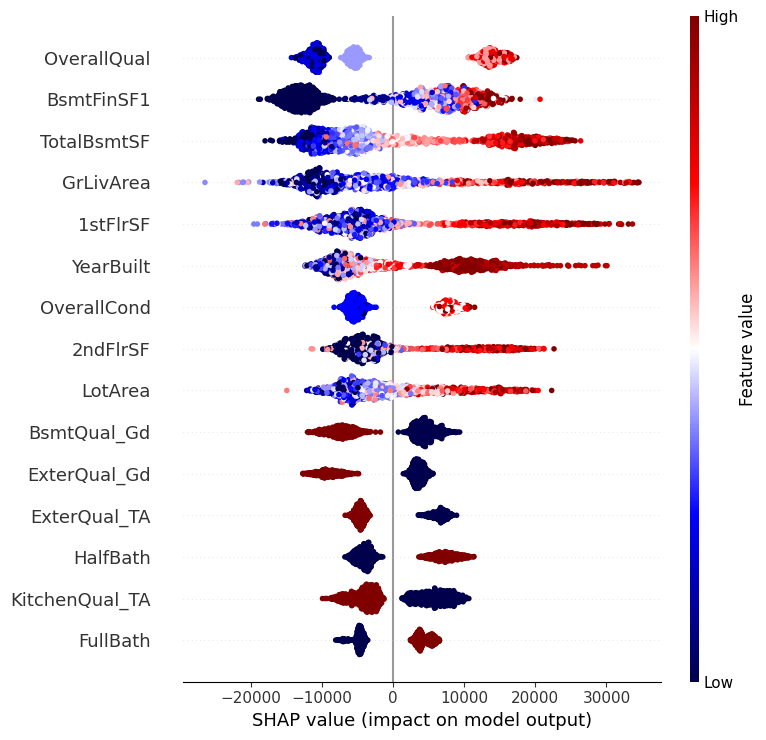

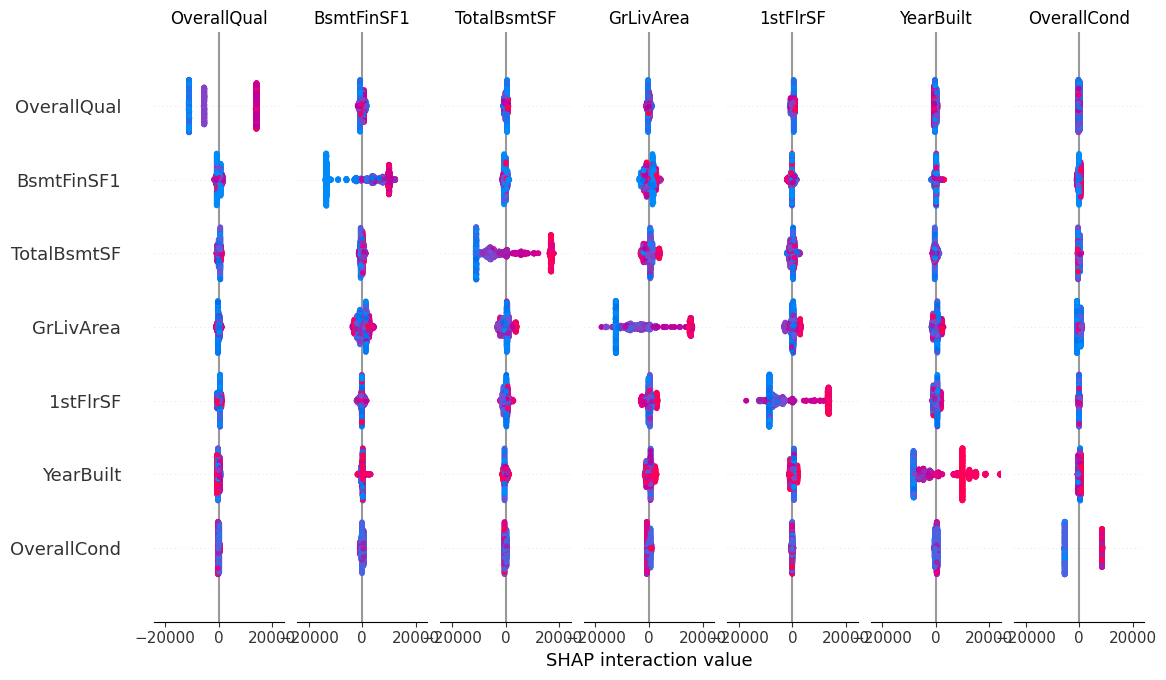

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

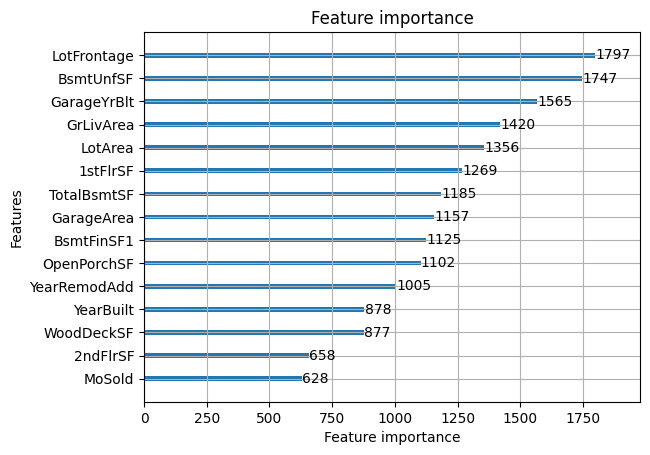

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import lightgbm as lgbm
import shap
import matplotlib.pyplot as plt
import optuna
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

# Define the objective function for Optuna to minimize
def objective(trial):
    params = {
        #         "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        "max_bin": trial.suggest_int("max_bin", 200, 300),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1
        ),
    }

    X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.2)
    
    model = LGBMRegressor(**params)
    model.fit(
        X_train_, y_train_,
        eval_set=[(X_val, y_val)],
        early_stopping_rounds=200,
        verbose=False
    )

    y_pred = model.predict(X_val)
    MSE = mean_squared_error(y_val, y_pred, squared=False)
    return MSE

# Load and preprocess the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

X_train = train.iloc[:, 1:-1]
y_train = train.iloc[:, -1]

X_train = pd.get_dummies(X_train)
test = pd.get_dummies(test)

missing_cols = set(X_train.columns) - set(test.columns)
for c in missing_cols:
    test[c] = 0
test = test[X_train.columns]

# Define the study and optimize
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100) #make 100

# Train the model with the best hyperparameters
best_params = study.best_params
model = LGBMRegressor(**best_params)
model.fit(X_train, y_train)

# Generate the SHAP values (outputs summary plot when button is pressed)
explainer = shap.Explainer(model)
shap_values = explainer(test)

shap.summary_plot(shap_values, test, max_display=15, cmap='seismic')

explainer = shap.TreeExplainer(model)
shap_interaction = explainer.shap_interaction_values(test)

shap.summary_plot(shap_interaction, test)

# Generate the feature importance plot
lgbm.plot_importance(model, max_num_features=15)